**Taller dos:**

**David Garzón Ramírez.
C.C 1000758293**


**Mariana Fernandez Prieto.**

**Elaborar un programa para calcular el campo eléctrico producido por un dipolo eléctrico, realizar una representación del campo para todo el dominio elegido para calcular el campo. Para encontrar el campo, se sugiere hacer lo siguiente:

**a. Encontrar el campo en un punto producido por dos cargas q1 y q2. b. Emplee el comando plt.quiver(x, y, Ex, Ey) para mostrar el campo producido por q1 y q2. Puedes intentarlo con el comando, plt.stremplot. c. Generalice el problema para varios puntos en el espacio.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ke = 1

def E_campo(rp,q, rq ):
  """
  Magnitud del campo electrico
  
  rp posición del punto para encontrar el campo electrico
  q valor de la carga 
  rq posicion de la carga
  
  """
  
  Delta_R =  rp - rq 
  r=np.sqrt(Delta_R[0]**2 + Delta_R[1]**2)
  ur=Delta_R/r
  global k
  return (ke*q/r**2)*ur  #Devuelve el campo

In [3]:
r_source = {'q1':1,"r1": np.array([2., 0]),'q2':-1,"r2":np.array([-3.,0])}
#r1 posicion de la carga 1
#r2 posicion de la carga 2
rp       = np.array([1.,1])  # Punto para encontrar el campo electrico
E_campo(rp,r_source["q2"],r_source["r2"])

array([-0.05706721, -0.0142668 ])

In [4]:

campo2=E_campo(rp,r_source["q2"],r_source["r2"])
campo1=E_campo(rp,r_source["q1"],r_source["r1"])

E=campo1+campo2

E

array([-0.4106206 ,  0.33928659])

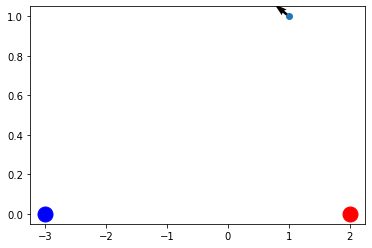

In [5]:
plt.figure()
plt.plot(r_source["r1"][0], r_source["r1"][1], "ro",markersize=15)#posicion de q1
plt.plot(r_source["r2"][0], r_source["r2"][1],'bo',markersize=15)#posicion de q2
plt.plot(rp[0], rp[1],"o")#punto donde encuentro el campo
plt.quiver(rp[0], rp[1],E[0],E[1])#graficar la flecha


In [6]:
#campo generado por un dipolo sobre una malla

# Definir los puntos donde se se determinara el campo electrico 

x  = np.arange(-2, 3,0.5)
n1 = len(x)
y  = np.arange(-2, 3,0.5)
n2 = len(y)


In [7]:
rp = np.zeros((n1*n2 , 2)) #matriz
j = 0
for x_ in (x):
  for y_ in (y):
    rp[j] = np.array([x_, y_]) # se guaradar los vectores x_,y_
    j=j+1
    



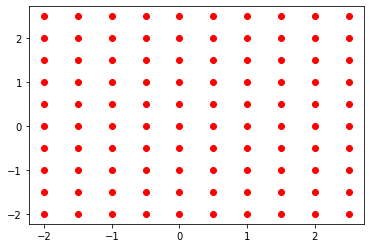

In [8]:
plt.plot(rp[:,0], rp[:,1],"ro")


In [9]:
#campo generado por q1 sobre todos los puntos


E1 = np.zeros((n1*n2, 2))
#en esta matriz se incluiran los valores del campo generado por q1

for i in range(0, len(rp)):
    E1[i] = E_campo(rp[i],r_source["q1"],r_source["r1"])
#en E1[i] se guarda el campo

<ipython-input-2-32776c42a7f4>:15: RuntimeWarning: invalid value encountered in true_divide
  ur=Delta_R/r
<ipython-input-2-32776c42a7f4>:17: RuntimeWarning: divide by zero encountered in double_scalars
  return (ke*q/r**2)*ur  #Devuelve el campo


In [10]:
#campo generado por q2 sobre todos los puntos


E2 = np.zeros((n1*n2, 2))# 
#en esta matriz se incluiran los valores del campo generado po q2

for i in range(0, len(rp)):
  E2[i] =E_campo(rp[i],r_source["q2"],r_source["r2"])
  #en E2[i] se guarda el campo


In [11]:
E=E1+E2


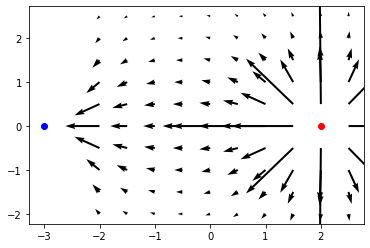

In [12]:

plt.figure()
plt.plot(r_source["r1"][0], r_source["r1"][1], "ro")#posiscion de q1
plt.plot(r_source["r2"][0], r_source["r2"][1], "bo")#posicion de q2
plt.quiver(rp[:,0], rp[:,1], E[:,0], E[:,1])


## Movimiento parabólico.

**Un jugador de baloncesto desea saber si encestará su tiro dependiendo de la velocidad inicial, ángulo de lanzamiento y posición respecto a la canasta.
Elabore un programa en el que dada una distancia, velocidad inicial y ángulo, determine si hay cesta. El modelo será bajo partícula, sin la rotación del balón.

Se recomienda emplear numpy array.

### Tiro parabólico
$$y(t) = y_0 + v_{0x}t - \frac{1}{2}gt^2 \ \ \ (1)$$

In [13]:
import numpy as np
import matplotlib.pylab as plt

In [14]:
'''
theta = float(input('Ingrese el ángulo de lanzamiento en grados: '))
v0 = float(input('Ingrese la velocidad inicial: '))
a = float(input('Ingrese la altura de Mariana: '))
d = float(input('Ingrese la distancia a la que está la cesta: '))
h = float(input('Ingrese la altura a la que está la cesta: '))
g = 9.8      # Aceleración de la gravedad [m/s^2]

if not (theta>0 and theta<90 and v0>0 and a>0 and d>0 and h>0):
    print('\nNo ingresó los datos correctamente')
'''

"\ntheta = float(input('Ingrese el ángulo de lanzamiento en grados: '))\nv0 = float(input('Ingrese la velocidad inicial: '))\na = float(input('Ingrese la altura de Mariana: '))\nd = float(input('Ingrese la distancia a la que está la cesta: '))\nh = float(input('Ingrese la altura a la que está la cesta: '))\ng = 9.8      # Aceleración de la gravedad [m/s^2]\n\nif not (theta>0 and theta<90 and v0>0 and a>0 and d>0 and h>0):\n    print('\nNo ingresó los datos correctamente')\n"

In [15]:
theta = 30   # Ángulo de lanzamiento [grados]
v0 = 10      # velocidad inicial [m/s]
a = 1.5      # Altura de la persona [m]
d, h = 20, 15    # Posición de la canasta: (distancia, altura) [m]
g = 9.8      # Aceleración de la gravedad [m/s^2]

# Componentes de la velocidad inicial
v0x = v0*np.cos(theta*np.pi/180)
v0y = v0*np.sin(theta*np.pi/180)

# Ecuaciones cinemáticas de posición
x = lambda t: v0x*t
y = lambda t: a + v0y*t - 0.5*g*t**2

**Análisis**

El balón describe una trayectoria parabólico que es continua para $x$ en todos los reales. Así, podemos usar este hecho y 
determinar el tiempo $t_1$ en el que esta trayectoria toma el valor horizontal $x=d$ que es la distancia de la cesta, 
por tanto, Si $y(d)=h$ (altura de la cesta), entonces el balón alcanza la cesta.

In [16]:
t1 = d/v0x    # Tiempo en el que hay cesta
eps = 1.0e-10
if abs(y(t1)-h)<eps:
    print('El balón sí encestó')
else:
    print('El balón no encestó')

El balón no encestó


In [17]:
y(t1)

-13.08632794954082

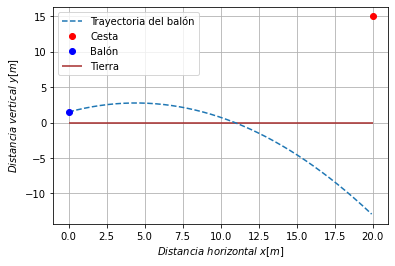

In [18]:
t = np.arange(0, t1, 0.01)   # Tiempo (inicio, final, paso) --> [0,5)

X, Y = x(t), y(t)

plt.plot(X, Y, '--', label='Trayectoria del balón')   # Trayectoria del balón
plt.plot(d, h, 'o', c='r', label='Cesta')             # Punto donde está la cesta
plt.plot(0, a, 'o', c='b', label='Balón')
plt.hlines(0, 0, d, colors='brown', label='Tierra')
plt.legend()
plt.xlabel('$Distancia \ horizontal \ x[m]$')
plt.ylabel('$Distancia \ vertical \ y[m]$')
plt.grid()